**PROJECT**


> project ini merupakan solusi data science untuk permasalahan *default risk* atau risiko gagal bayar menggunakan dataset Home Credit Defaults Risk dengan langkah-langkah mengikuti framework CRISP-DM.



# Business Understanding



>Risiko kredit adalah hal tak terbantahkan dari sebuah perusahan penyedia layanan pembiayaan. Salah satu risiko kredit yang sering dialami yaitu gagalnya nasabah untuk membayar kredit (*default risk*). Business problem yang dihadapi adalah tingginya persentase gagal bayar kredit sebesar 8% atau setara dengan 20 ribu orang, yang dapat berdampak negatif pada keuangan perusahaan dan reputasi perusahaan di mata nasabah. Salah satu perusahaan yakni Home Credit berupaya untuk meningkatkan performa hasil analisisnya dalam risiko kredit. Home Credit menggunakan berbagai data alternatif--termasuk telekomunikasi dan informasi transaksional-- untuk memprediksi kemampuan pembayaran klien mereka.

>Proyek ini bertujuan untuk memprediksi aspek yang berpengaruh terhadap ketidakmampuan nasabah dalam membayar kredit menggunakan model machine learning. Dengan diketahui faktor tersebut, maka Home Credit dapat memprediksi apakah client akan gagal bayar kredit atau tidak.

# Data Understanding

In [ ]:
#import libraries untuk olah data
import pandas as pd
import numpy as np
#import libraries untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

#menampilkan maksimum 200 kolom pada output data frame
pd.set_option('display.max_columns', None)

#menghilangkan pesan peringatan (warning) yang muncul saat menjalankan program
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/application_train.csv')
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
data.shape

(307511, 122)

In [ ]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

>**Summary**
* Dataset di atas berisikan data statis untuk semua peminjam. Satu baris mewakili satu pinjaman dalam sampel data.
* Dateset terdiri dari 307511 baris dan 122 kolom. Dengan mengetahui ukuran dataset, akan didapatkan gambaran tentang seberapa besar data yang harus diproses dan mempersiapkan langkah selanjutnya dalam melakukan analisis atau pembuatan model machine learning.
* Variabel target ada pada kolom bernama TARGET yang berisi mengenai kemampuan seorang peminjam yang ditulis dalam angka 1 (untuk nasabah yang kesulitan/keterlambatan dalam membayar kembali pinjaman) dan 0 (bagi nasabah yang dapat membayar kembali pinjaman/tepat waktu dalam membayar pinjaman).
* Terdapat kolom DAYS_BIRTH, DAYS_ID_PUBLISH, DAYS_REGISTRATION, DAYS_EMPLOYED, dan DAYS_LAST_PHONE_CHANGE yang berisikan hitungan hari dengan nilai negatif sehingga perlu diganti format datanya.



#Data Preparation

## Formatting Data

Data akan dibenahi formatnya dan dirubah menjadi tahun untuk memudahkan analisis selanjutnya.

In [ ]:
#membenahi format data
data['DAYS_BIRTH'] = (data['DAYS_BIRTH']*-1/365)
data["DAYS_ID_PUBLISH"] = (data['DAYS_ID_PUBLISH']*-1/365)
data["DAYS_REGISTRATION"] = (data['DAYS_REGISTRATION']*-1/365)
data["DAYS_LAST_PHONE_CHANGE"] =(data['DAYS_LAST_PHONE_CHANGE']*-1/365)
data['DAYS_EMPLOYED'] =abs(data['DAYS_EMPLOYED']/365)

Selanjutnya akan dilakukan handling missing value.

## Handling Missing Value

Banyaknya atau kuantitas misssing value dalam sebuah dataset penting untuk diperhatikan. Hal tersebut disebabkan cara menangani missing value pada kolom dengan hanya 1% missing value perlu dibedakan dengan kolom berisi 90% missing value.

In [ ]:
data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

Meskipun dapat dilihat dengan jelas terdapat beberapa kolom dengan missing value, hasil tersebut tidak terlalu membantu. Karena dataset yang digunakan sangat besar yang tentunya  memiliki missing data, perlu kita telusuri lebih jauh. Akan digunakan list untuk menampilkan kolom dengan missing value seperti di bawah ini.

In [ ]:
data.columns[data.isnull().any()].tolist()

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',

In [ ]:
# membuat fungsi untuk menunjukkan info missing value
def missing_values_info(data):

    # menemukan missing values pada tiap kolom
    count_missing = data.isnull().sum()

    # membuat missing values dalam bentuk percent
    percent_missing = (100 * count_missing / data.shape[0]).round(1)

    # membuat dataframe dengan hasil di atas
    missing_df = pd.DataFrame({'Count Missing':count_missing,
                               'Percent Missing':percent_missing})

    # mengurutkan nilai berdasarkan persentase jumlah data yang missing dari yang terbesar
    missing_df = missing_df.sort_values('Percent Missing', ascending=False)

    # menghitung total persentase dari banyaknya kolom dengan missing value dan membandingkannya dengan total kolom yang ada
    missing_values_list = data.columns[data.isnull().any()].tolist()
    cols_missing_vals = len(missing_values_list)
    df_cols = data.shape[1]

    print(f'Kolom dengan Missing Values: {cols_missing_vals}')
    print(f'Total Kolom: {df_cols}')
    print(f'Persentase dari Banyaknya Kolom dengan Missing Values: {round(cols_missing_vals/df_cols*100,1)}%')

    return missing_df

missing_values_info(data).head(20)

Kolom dengan Missing Values: 67
Total Kolom: 122
Persentase dari Banyaknya Kolom dengan Missing Values: 54.9%


,Count Missing,Percent Missing
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4


Terlihat di atas bahwa pada dataset separuh dari itu berisi kolom dengan missing value, yakni sebanyak 67 dari 122 kolom terdapat missing value. Selanjutnya, kolom yang berisi missing value lebih dari 50% akan didrop karena apabila diisi dengan suatu nilai dapat menyebabkan bias pada hasil prediksi.

In [ ]:
#menghapus kolom berdasarkan persentase missing value
def drop_missing_values(dataframe, threshold):

    # membuat list dari kolom dengan jumlah missing value melebihi thershold
    to_drop = [col for col in dataframe if
               (dataframe[col].isnull().sum()/len(dataframe) >= threshold)]

    print('Kolom yang didrop: ' , (len(to_drop)))
    # drop kolom
    dataframe = dataframe.drop(columns=to_drop)
    print('Shape: ', dataframe.shape)
    return dataframe

data = drop_missing_values(data, .5)

# menampilkan jumlah missing value
missing_values_info(data).head(20)

Kolom yang didrop:  41
Shape:  (307511, 81)
Kolom dengan Missing Values: 26
Total Kolom: 81
Persentase dari Banyaknya Kolom dengan Missing Values: 32.1%


,Count Missing,Percent Missing
FLOORSMAX_AVG,153020,49.8
FLOORSMAX_MODE,153020,49.8
FLOORSMAX_MEDI,153020,49.8
YEARS_BEGINEXPLUATATION_AVG,150007,48.8
YEARS_BEGINEXPLUATATION_MODE,150007,48.8
YEARS_BEGINEXPLUATATION_MEDI,150007,48.8
TOTALAREA_MODE,148431,48.3
EMERGENCYSTATE_MODE,145755,47.4
OCCUPATION_TYPE,96391,31.3
EXT_SOURCE_3,60965,19.8


Kolom yang didrop sebanyak 41 kolom dan tersisa 81 kolom dengan 26 diantaranya masih terdapat missing value. Persentase dari jumlah kolom dengan missing value menurun yakni menjadi 32%. Kolom-kolom tersebut akan menggunakan fungsi fillna untuk mengisi missing valuenya. Sebelum itu, akan dibagi datanya menjadi data kategorik dan numerik.

In [ ]:
#untuk data pada kolom CODE_GENDER ganti XNA menjadi missing untuk diimpute
data['CODE_GENDER'].replace('XNA', np.nan, inplace=True)

# Mengganti XNA menjadi NaN pada kolom ORGANIZATION_TYPE
data['ORGANIZATION_TYPE'].replace('XNA', np.nan, inplace=True)

categorical_vars = [var for var in data.columns if data[var].isnull().any() and
                   data[var].dtypes=='O']
categorical_vars

['CODE_GENDER',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

In [ ]:
numeric_vars=data.columns[data.isnull().any()].tolist()
numeric_vars = [e for e in numeric_vars if e not in categorical_vars]
numeric_vars

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

Pada data numerik, kolom dengan missing value akan diisi dengan nilai mediannya karena data tidak berdistribusi normal.

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
data[numeric_vars] = imputer.fit_transform(data[numeric_vars])

missing_values_info(data).head(20)

Kolom dengan Missing Values: 5
Total Kolom: 81
Persentase dari Banyaknya Kolom dengan Missing Values: 6.2%


,Count Missing,Percent Missing
EMERGENCYSTATE_MODE,145755,47.4
OCCUPATION_TYPE,96391,31.3
ORGANIZATION_TYPE,55374,18.0
NAME_TYPE_SUITE,1292,0.4
SK_ID_CURR,0,0.0
OBS_60_CNT_SOCIAL_CIRCLE,0,0.0
FLAG_DOCUMENT_5,0,0.0
FLAG_DOCUMENT_4,0,0.0
FLAG_DOCUMENT_3,0,0.0
FLAG_DOCUMENT_2,0,0.0


In [ ]:
data[categorical_vars].describe()

,CODE_GENDER,NAME_TYPE_SUITE,OCCUPATION_TYPE,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE
count,307507,306219,211120,252137,161756
unique,2,7,18,57,2
top,F,Unaccompanied,Laborers,Business Entity Type 3,No
freq,202448,248526,55186,67992,159428


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(data[categorical_vars])
data[categorical_vars] = imputer.transform(data[categorical_vars])

In [ ]:
data = pd.DataFrame(data)

In [ ]:
missing_values_info(data)

Kolom dengan Missing Values: 0
Total Kolom: 81
Persentase dari Banyaknya Kolom dengan Missing Values: 0.0%


,Count Missing,Percent Missing
SK_ID_CURR,0,0.0
EXT_SOURCE_3,0,0.0
FLAG_DOCUMENT_6,0,0.0
FLAG_DOCUMENT_5,0,0.0
FLAG_DOCUMENT_4,0,0.0
...,...,...
FLAG_EMAIL,0,0.0
FLAG_PHONE,0,0.0
FLAG_CONT_MOBILE,0,0.0
FLAG_WORK_PHONE,0,0.0


In [ ]:
data.shape

(307511, 81)

Ukuran data setelah handling missing value adalah 307511 baris dan 81 kolom.


## Checking Outliers and Anomali Handling

Akan dilihat nilai outliers pada kolom numerik menggunakan boxplot. Kolom numerik setelah handling missing values terdapat 68 kolom.

In [ ]:
nums=[i for i in data.columns if data[i].dtypes != 'object']

In [ ]:
len(nums)

68

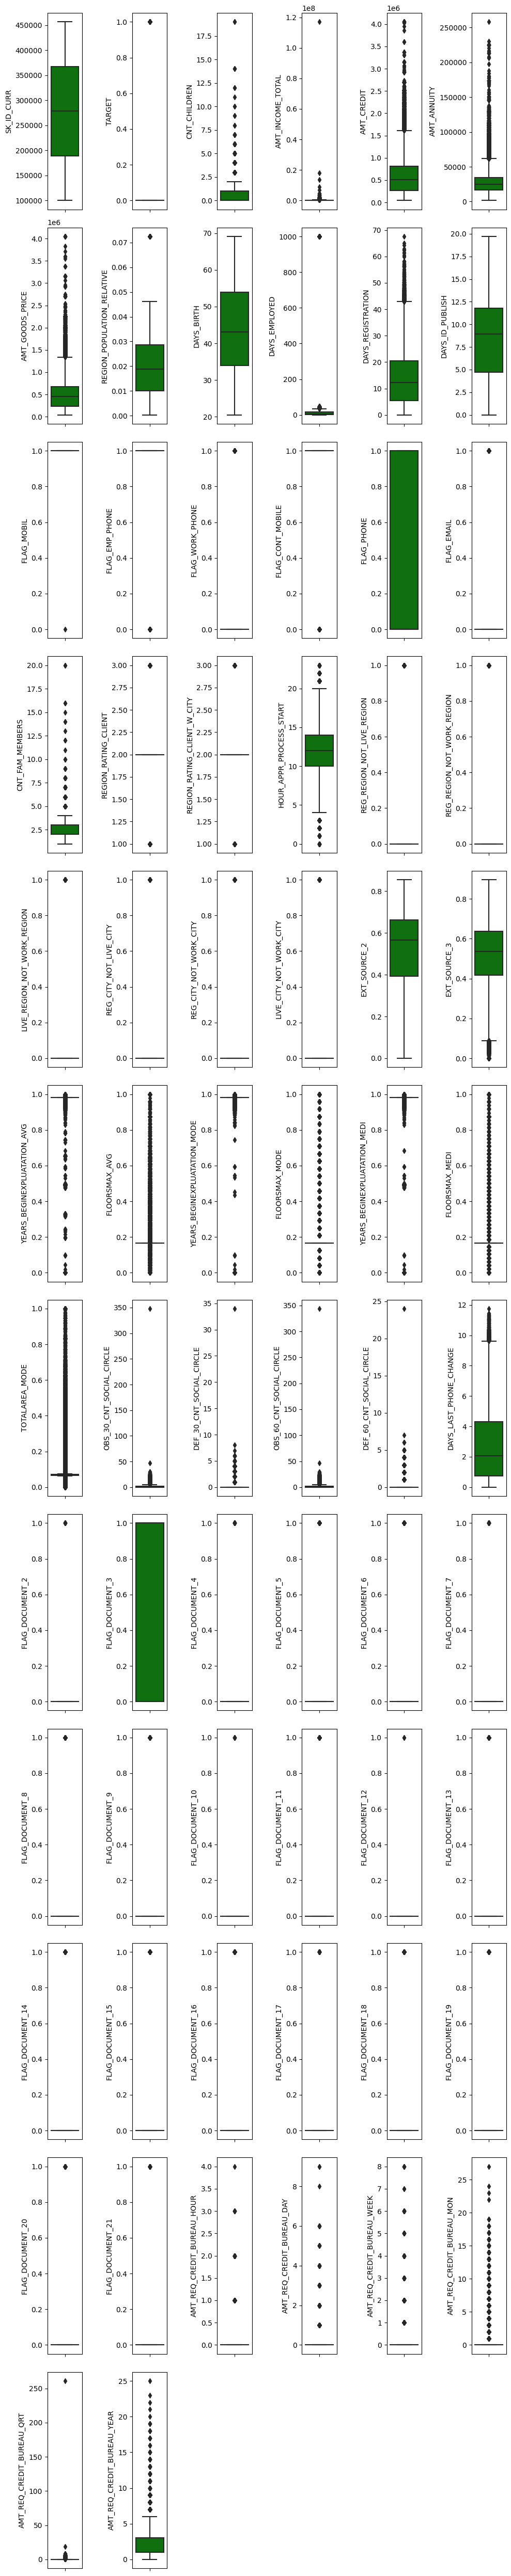

In [ ]:
plt.figure(figsize=(10,50))
for i in range(0, len(nums)):
    plt.subplot(12, 6, i+1)
    sns.boxplot(y=data[nums[i]], color='green', orient='v')
    #memperbaiki tata letak tabel agar lebih rapi dan sesuai dengan ukuran halaman yang ditentukan dapat menjadikan gambar tidak terpotong saat diunduh
    plt.tight_layout()

Outliers di atas masih masuk akal, seperti outliers pada jumlah kredit dan jumlah anuitas yang diperkirakan memiliki hubungan linier sehingga outliers satu sama lain berhubungan. Selain itu pada kolom jumlah anak yang dimiliki. Mempunyai anak mencapai 20 memungkinkan, meskipun jarang ditemui tetapi tetap mungkin terjadi.

<Axes: ylabel='DAYS_EMPLOYED'>

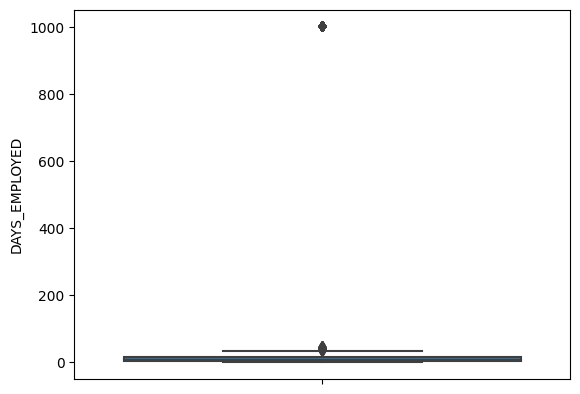

In [ ]:
sns.boxplot(y=data['DAYS_EMPLOYED'], data=data,orient = 'v')

Dalam hal ini terdapat nilai anomali yakni 1000 tahun pada kolom DAYS_EMPLOYED, hal tersebut telah dijelaskan pada data analysis, dan pada tahap ini, baris tersebut akan dihapus.

In [ ]:
data['DAYS_EMPLOYED'].max()

1000.6657534246575

In [ ]:
data['DAYS_EMPLOYED'].value_counts().max()

55374

Banyaknya baris pada DAYS_EMPLOYED yang memiliki nilai max ada 55.374 baris. Baris tersebut akan dihapus.

In [ ]:
max_value = data['DAYS_EMPLOYED'].max()
filter = data['DAYS_EMPLOYED']==max_value
data.drop(data[filter].index, inplace=True)

data.shape

(252137, 81)

Ukuran data menjadi 252.137 baris dan 81 kolom.

<Axes: ylabel='DAYS_EMPLOYED'>

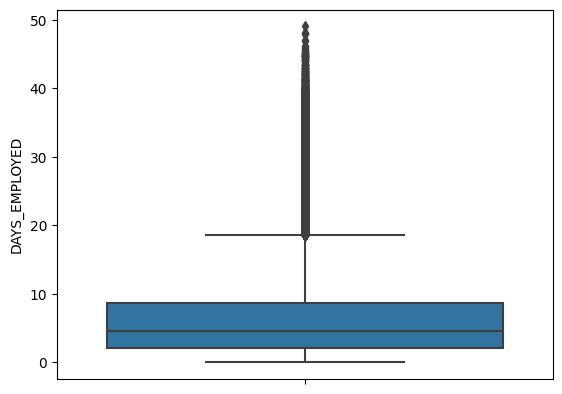

In [ ]:
sns.boxplot(y=data['DAYS_EMPLOYED'], data=data,orient = 'v')

Terlihat dari boxplot sudah tidak ada nilai anomali dan nilai maksimalnya menjadi 49 tahun.

In [ ]:
data['DAYS_EMPLOYED'].max()

49.07397260273972

# Data Analysis

Selanjutnya, setelah dilakukan data understanding, akan dilakukan data analysis untuk menganalisis dataset yang ada. Langkah pertama dalam data analysis yakni *univariate analysis*. Penjelasan lebih lanjut adalah sebagai berikut.

## Univariate Analysis

*Univariate analysis* berisi analisis data satu variabel.

### TARGET

In [ ]:
data['TARGET'].value_counts()

0    230302
1     21835
Name: TARGET, dtype: int64

In [ ]:
#Percentage calculation
print("Percentage : ")
(data["TARGET"].value_counts()/data["TARGET"].count())*100

Percentage : 


0    91.340025
1     8.659975
Name: TARGET, dtype: float64

Text(0.5, 1.0, 'Proportions of TARGET')

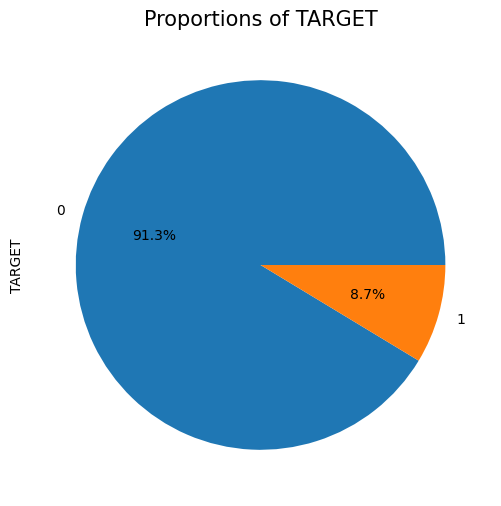

In [ ]:
plt.figure(figsize=(8,6))
data['TARGET'].value_counts(normalize=True).plot(kind='pie', autopct="%.1f%%")
plt.title('Proportions of TARGET', fontsize=15)


- Jumlah nasabah yang tidak akan melunasi pinjaman tepat waktu: 230302 orang , (8.7 %)
- Jumlah nasabah yang akan mengembalikan pinjaman tepat waktu: 21835 orang, (91.3%)
- Terdapat ketidakseimbangan data.

**Function to plot the Stacked Bar Plot**

Fungsi ini digunakan untuk membuat jenis grafik batang yang mewakili kontribusi proporsional dari masing-masing titik data dibandingkan dengan total.

In [ ]:
def stack_plot(data, xtick, col2='TARGET', col3='total') :
  ind = np.arange(data.shape[0])

  if len (data[xtick].unique())<5:
    plt.figure(figsize=(5,5))

  elif len (data[xtick].unique())>5 & len(data[xtick].unique())<10:
    plt.figure(figsize=(7,7))
  else :
    plt.figure(figsize=(15,15))
  p1= plt.bar(ind, data[col3].values)
  p2= plt.bar(ind, data[col2].values)

  plt.ylabel('Pinjaman')
  plt.title('Jumlah keterlambatan pembayaran pinjaman VS pembayaran tepat waktu')
  plt.xticks(ticks=ind, rotation=90, labels = list(data[xtick].values))
  plt.legend((p1[0], p2[0]), ('pembayaran tepat waktu', 'keterlambatan pembayaran'))
  plt.show()

**Function to plot Univariated Bar Plot**

Fungsi ini digunakan untuk visualisasi data univariat pada sumbu dua dimensi. Sumbu x adalah sumbu kategori yang menunjukkan kategori, sedangkan sumbu y adalah sumbu nilai yang menunjukkan nilai numerik dari kategori tersebut, yang ditunjukkan oleh panjang grafik batang.

In [ ]:
def univariate_barplots(data, col1, col2='TARGET', top=False):

    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()


    temp['total'] = pd.DataFrame(data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']

    temp.sort_values(by=['total'],inplace=True, ascending=False)

    if top:
        temp = temp[0:top]

    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

### Name_Contract_Type

In [ ]:
data['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         226224
Revolving loans     25913
Name: NAME_CONTRACT_TYPE, dtype: int64

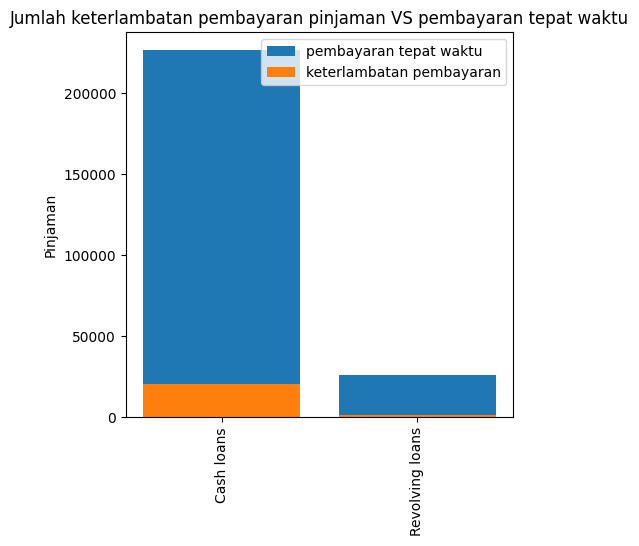

  NAME_CONTRACT_TYPE  TARGET   total       Avg
0         Cash loans   20371  226224  0.090048
1    Revolving loans    1464   25913  0.056497
  NAME_CONTRACT_TYPE  TARGET   total       Avg
0         Cash loans   20371  226224  0.090048
1    Revolving loans    1464   25913  0.056497


In [ ]:
univariate_barplots(data, 'NAME_CONTRACT_TYPE', 'TARGET', False)

Sebagian besar orang mengambil pinjaman dalam bentuk pinjaman tunai (cash loans) daripada pinjaman bergulir (revolving loans) seperti kartu kredit. Dari 226.224 peminjam cash loans, terdapat 20.371  peminjam yang mengalami keterlambatan pembayaran.


### Code_Gender

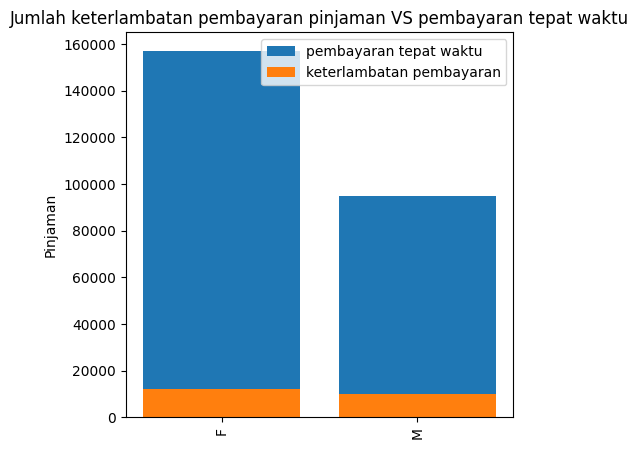

  CODE_GENDER  TARGET   total       Avg
0           F   11921  157181  0.075843
1           M    9914   94956  0.104406
  CODE_GENDER  TARGET   total       Avg
0           F   11921  157181  0.075843
1           M    9914   94956  0.104406


In [ ]:
univariate_barplots(data, 'CODE_GENDER', 'TARGET', False)

- Wanita mengambil lebih banyak pinjaman dibandingkan dengan pria.
- Dan ada saat yang sama, wanita sedikit lebih mampu membayar kembali pinjaman dibandingkan dengan pria. Pria mampu membayar kembali pinjaman mereka dalam 90% kasus, sedangkan wanita hanya mampu membayar dalam 93% kasus.

### Flag_Own_Car

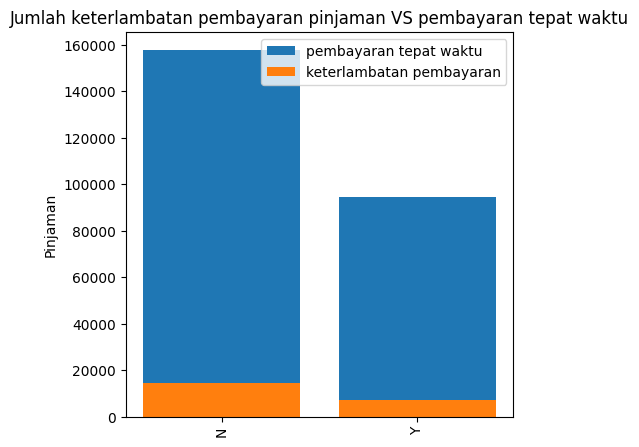

  FLAG_OWN_CAR  TARGET   total       Avg
0            N   14753  157719  0.093540
1            Y    7082   94418  0.075007
  FLAG_OWN_CAR  TARGET   total       Avg
0            N   14753  157719  0.093540
1            Y    7082   94418  0.075007


In [ ]:
univariate_barplots(data, 'FLAG_OWN_CAR', 'TARGET', False)

Sebagian besar pemohon pinjaman tidak memiliki mobil.
Namun, tidak banyak perbedaan status pembayaran pinjaman untuk pelanggan berdasarkan informasi ini (masing-masing 9% dan 7%) sehingga dapat menyimpulkan bahwa fitur ini tidak terlalu berguna.

###Flag_Own_Realty

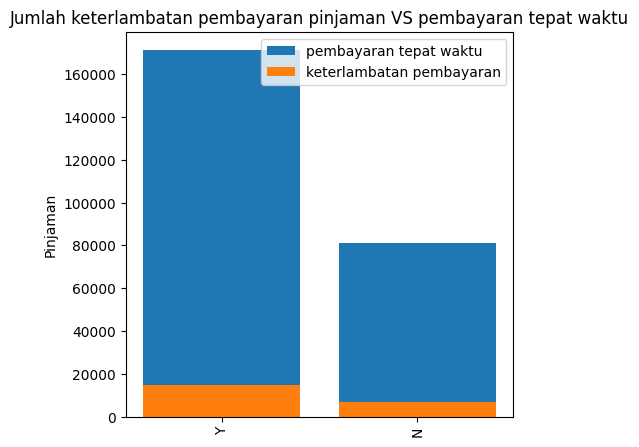

  FLAG_OWN_REALTY  TARGET   total       Avg
1               Y   14725  171082  0.086070
0               N    7110   81055  0.087718
  FLAG_OWN_REALTY  TARGET   total       Avg
1               Y   14725  171082  0.086070
0               N    7110   81055  0.087718


In [ ]:
univariate_barplots(data, 'FLAG_OWN_REALTY', 'TARGET', False)

Sebagian besar pemohon pinjaman memiliki flat/rumah.
Namun, tidak banyak perbedaan status pembayaran pinjaman untuk nasabah berdasarkan informasi ini (masing-masing 8,6% dan 8,7%) sehingga dapat menyimpulkan bahwa fitur ini tidak terlalu berguna.

### Cnt_Children

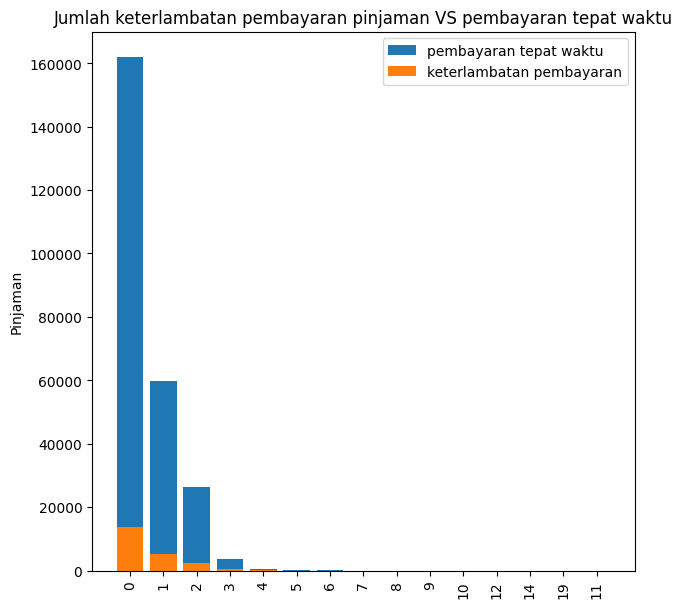

   CNT_CHILDREN  TARGET   total       Avg
0             0   13772  161911  0.085059
1             1    5347   59698  0.089567
2             2    2295   26365  0.087047
3             3     352    3629  0.096996
4             4      54     414  0.130435
    CNT_CHILDREN  TARGET  total  Avg
10            10       0      2  0.0
12            12       0      2  0.0
13            14       0      2  0.0
14            19       0      2  0.0
11            11       1      1  1.0


In [ ]:
univariate_barplots(data, 'CNT_CHILDREN', 'TARGET', False)

Pelamar yang tidak memiliki anak mengambil jumlah pinjaman yang jauh lebih tinggi.
Namun,tidak banyak perbedaan status pembayaran pinjaman untuk nasabah berdasarkan informasi ini sehingga dapat menyimpulkan bahwa fitur ini tidak terlalu berguna.

### Amt_Income_Total

In [ ]:
income_data = data.groupby('SK_ID_CURR').agg({'AMT_INCOME_TOTAL':'mean'}).reset_index()
income_data.head(2)

,SK_ID_CURR,AMT_INCOME_TOTAL
0,100002,202500.0
1,100003,270000.0


In [ ]:
income_data_final = pd.merge(data, income_data, on='SK_ID_CURR', how='left')

approved_income = income_data_final[income_data_final['TARGET']==0]['AMT_INCOME_TOTAL_x'].values

rejected_income = income_data_final[income_data_final['TARGET']==1]['AMT_INCOME_TOTAL_x'].values

In [ ]:
from prettytable import PrettyTable

x=PrettyTable()
x.field_names=["Percentile", "Pembayaran Tepat Waktu", "Keterlambatan Pembayaran"]
for i in range (0,101,5):
  x.add_row([i,np.round(np.percentile(approved_income,i), 3),\
               np.round(np.percentile(rejected_income,i), 3)])
print(x)

+------------+------------------------+--------------------------+
| Percentile | Pembayaran Tepat Waktu | Keterlambatan Pembayaran |
+------------+------------------------+--------------------------+
|     0      |        25650.0         |         27000.0          |
|     5      |        72000.0         |         67500.0          |
|     10     |        90000.0         |         90000.0          |
|     15     |        90000.0         |         90000.0          |
|     20     |        112500.0        |         103500.0         |
|     25     |        112500.0        |         112500.0         |
|     30     |        121500.0        |         112500.0         |
|     35     |        135000.0        |         126000.0         |
|     40     |        135000.0        |         135000.0         |
|     45     |        140400.0        |         135000.0         |
|     50     |        157500.0        |         144000.0         |
|     55     |        157500.0        |         157500.0      

Kita dapat melihat bahwa hingga persentil ke-40, baik pinjaman yang dibayar tepat waktu maupun yang dibayar terlambat sebagian besar memiliki nilai yang sama.
Akan tetapi, apabila dilihat lebih jauh, saat penghasilan meningkat peluang pembayaran pinjaman tepat waktu juga meningkat.

### Amt_Credit

In [ ]:
for i in data.groupby('SK_ID_CURR',as_index=False).size():
  if i.isdigit():
    j=int(i)
    print(j)

In [ ]:
data[data['SK_ID_CURR']==100002]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,3.106849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
approved_loan_credit = data[data['TARGET']==0]['AMT_CREDIT'].values

rejected_loan_credit = data[data['TARGET']==1]['AMT_CREDIT'].values

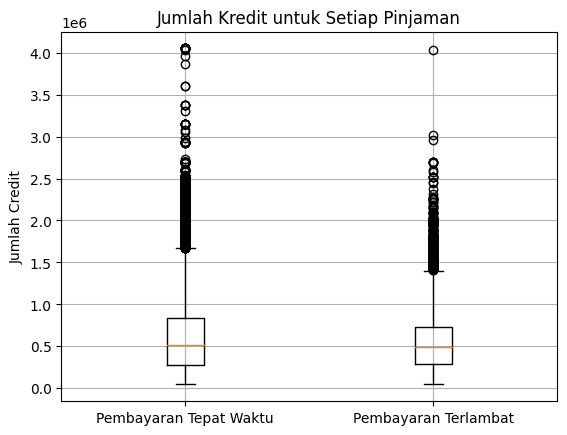

In [ ]:
plt.boxplot([approved_loan_credit, rejected_loan_credit])

plt.title('Jumlah Kredit untuk Setiap Pinjaman')
plt.xticks([1,2],('Pembayaran Tepat Waktu','Pembayaran Terlambat'))
plt.ylabel('Jumlah Credit')

plt.grid()
plt.show()

- Boxplot di atas menunjukkan bahwa nilai median dari jumlah kredit peminjam yang mampu mengembalikan pinjaman tepat waktu sedikit lebih besar dari nilai median peminjam yang terlambat.
- Hal tersebut artinya peminjam dengan jumlah kredit yang lebih tinggi memiliki kemungkinan yang sedikit lebih tinggi untuk mampu membayar pinjaman tepat waktu dibandingkan peminjam dengan jumlah kredit yang lebih rendah.

### Amt_Annuity

In [ ]:
capable_loan_annuity = data[data['TARGET']==0]['AMT_ANNUITY'].values
not_capable_loan_annuity = data[data['TARGET']==1]['AMT_ANNUITY'].values

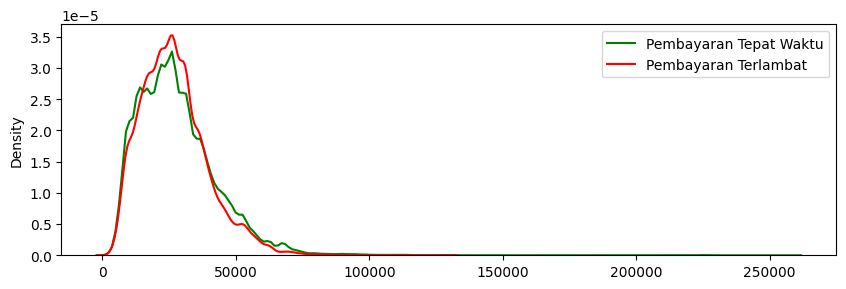

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(capable_loan_annuity,hist=False,label="Pembayaran Tepat Waktu", color='green')
sns.distplot(not_capable_loan_annuity,hist=False,label="Pembayaran Terlambat", color='red')
plt.legend()
plt.show()

Kebanyakan orang membayar anuitas di bawah 50.000 untuk pinjaman

### Name_Type_Suite

In [ ]:
data['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Other_A',
       'Children', 'Group of people', 'Other_B'], dtype=object)

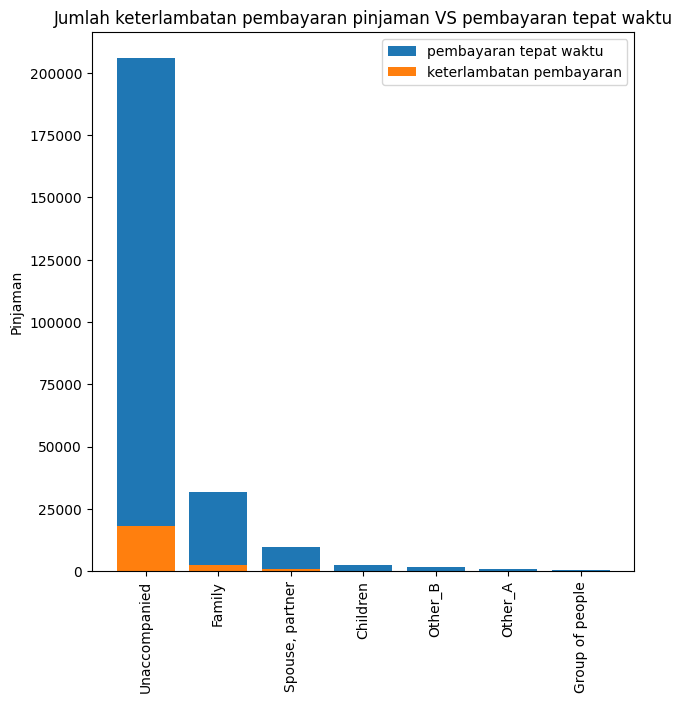

   NAME_TYPE_SUITE  TARGET   total       Avg
6    Unaccompanied   18095  206114  0.087791
1           Family    2519   31659  0.079567
5  Spouse, partner     806    9663  0.083411
0         Children     169    2250  0.075111
4          Other_B     155    1473  0.105227
   NAME_TYPE_SUITE  TARGET  total       Avg
5  Spouse, partner     806   9663  0.083411
0         Children     169   2250  0.075111
4          Other_B     155   1473  0.105227
3          Other_A      69    762  0.090551
2  Group of people      22    216  0.101852


In [ ]:
univariate_barplots(data, 'NAME_TYPE_SUITE','TARGET', False)

- Orang yang datang tanpa didampingi sesorang adalah kasus terbanyak, dengan 87% dari peminjam membayar tepat waktu.
- Dalam kemampuan pembayaran (pembayaran tepat waktu ataupun pembayaran terlambat), 'Unaccompanied' adalah kelas mayoritas dalam hal ini.
- Bar chart di sini turun sangat tajam, artinya ada banyak variabilitas.

###Name_Income_Type

In [ ]:
data['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Student',
       'Pensioner', 'Businessman', 'Maternity leave'], dtype=object)

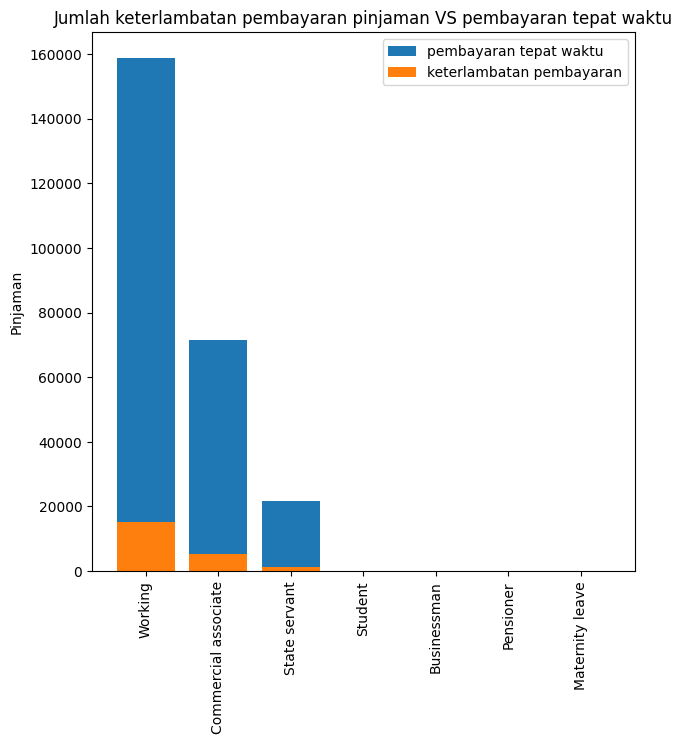

       NAME_INCOME_TYPE  TARGET   total       Avg
6               Working   15224  158774  0.095885
1  Commercial associate    5360   71617  0.074843
4         State servant    1249   21703  0.057550
5               Student       0      18  0.000000
0           Businessman       0      10  0.000000
  NAME_INCOME_TYPE  TARGET  total      Avg
4    State servant    1249  21703  0.05755
5          Student       0     18  0.00000
0      Businessman       0     10  0.00000
3        Pensioner       0     10  0.00000
2  Maternity leave       2      5  0.40000


In [ ]:
data['NAME_INCOME_TYPE'].fillna('Data_Not_Available', inplace=True)
univariate_barplots(data,'NAME_INCOME_TYPE','TARGET',False)

- Orang-orang yang bekerja (Working) mengambil pinjaman paling banyak sedangkan pekerja komersial (Commercial
Associates), pensiunan (Pensioners), dan pegawai negeri (State Servants) mengambil jumlah pinjaman yang jauh lebih sedikit.
- Terlihat bahwa sedikit titik data yang terkait dengan pengangguran (Unemployed), pelajar (student), pengusaha (Businessman), dan
perempuan cuti hamil (Maternity leave). Ada banyak variabilitas dalam hal ini.
- Satu pengamatan menarik di sini adalah kenyataan bahwa pinjaman yang diberikan kepada siswa dan pengusaha yang telah mengajukan, mereka telah dianggap mampu membayar kembali pinjaman dengan tepat waktu.

### Name_Education_Type

In [ ]:
data['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

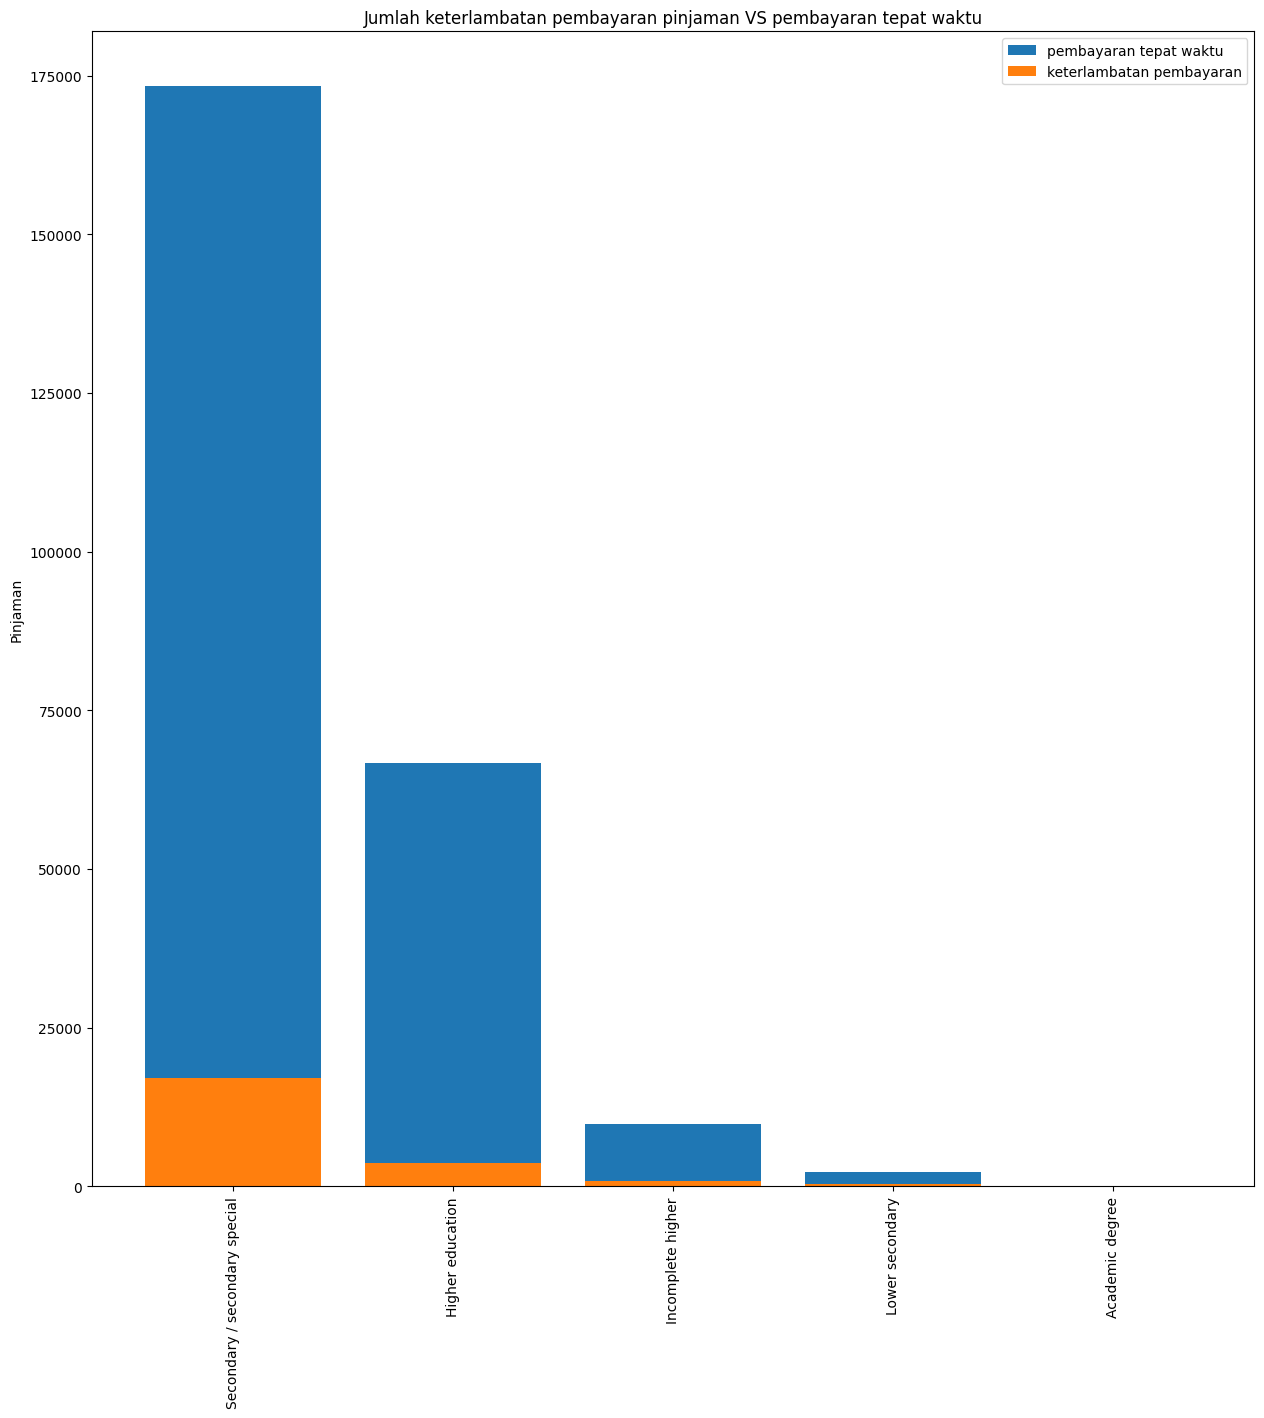

             NAME_EDUCATION_TYPE  TARGET   total       Avg
4  Secondary / secondary special   17000  173286  0.098104
1               Higher education    3669   66669  0.055033
2              Incomplete higher     848    9757  0.086912
3                Lower secondary     315    2287  0.137735
0                Academic degree       3     138  0.021739
             NAME_EDUCATION_TYPE  TARGET   total       Avg
4  Secondary / secondary special   17000  173286  0.098104
1               Higher education    3669   66669  0.055033
2              Incomplete higher     848    9757  0.086912
3                Lower secondary     315    2287  0.137735
0                Academic degree       3     138  0.021739


In [ ]:
data['NAME_EDUCATION_TYPE'].fillna('Data_Not_Available', inplace=True)
univariate_barplots(data,'NAME_EDUCATION_TYPE','TARGET',False)

- Sekali lagi, ada banyak variasi dalam  jenis pendidikan peminjam.
- Orang dengan Secondary/Secondary Special(Menengah Khusus/Menengah) sebagai tingkat pendidikan tertinggi dalam jumlah pinjaman dan mereka juga pembayaran terlambat paling tinggi.
- Secara persentase semakin tinggi tingkat pendidikan seseorang, kemampuan pembayaran pinjamannya juga meningkat.

### Name_Family_Status

In [ ]:
data['NAME_FAMILY_STATUS'].unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

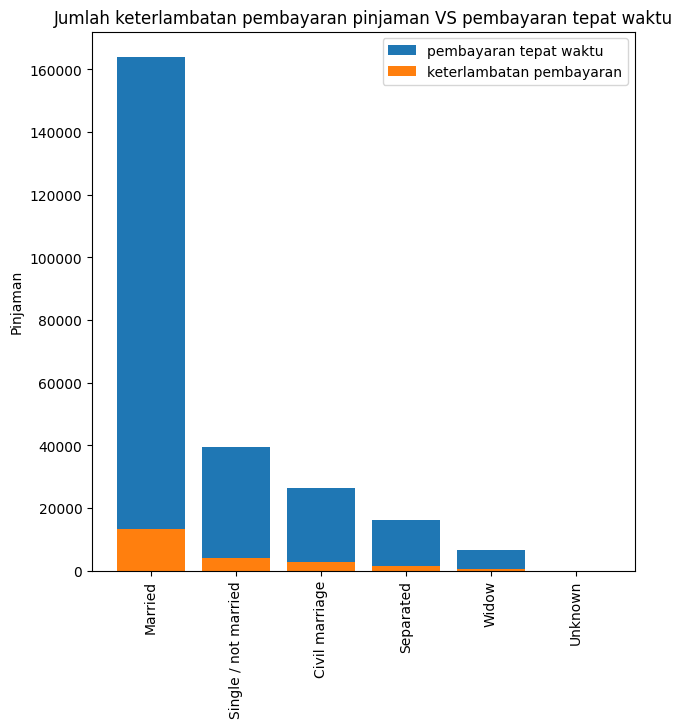

     NAME_FAMILY_STATUS  TARGET   total       Avg
1               Married   13189  163914  0.080463
3  Single / not married    4119   39316  0.104767
0        Civil marriage    2734   26197  0.104363
2             Separated    1392   16000  0.087000
5                 Widow     401    6708  0.059779
     NAME_FAMILY_STATUS  TARGET  total       Avg
3  Single / not married    4119  39316  0.104767
0        Civil marriage    2734  26197  0.104363
2             Separated    1392  16000  0.087000
5                 Widow     401   6708  0.059779
4               Unknown       0      2  0.000000


In [ ]:
data['NAME_FAMILY_STATUS'].fillna('Data_Not_Available',inplace=True)
univariate_barplots(data, 'NAME_FAMILY_STATUS','TARGET',False)

- Ada variabilitas di antara Status Keluarga peminjam tetapi tidak banyak
variabilitas jika kelas mayoritas (Married) diabaikan.
- Orang yang sudah menikah (Married) mengajukan pinjaman paling banyak dan jumlah orang yang dianggap tidak mampu membayar pinjaman juga yang tertinggi.

### Name_Housing_Type

In [ ]:
data['NAME_HOUSING_TYPE'].unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

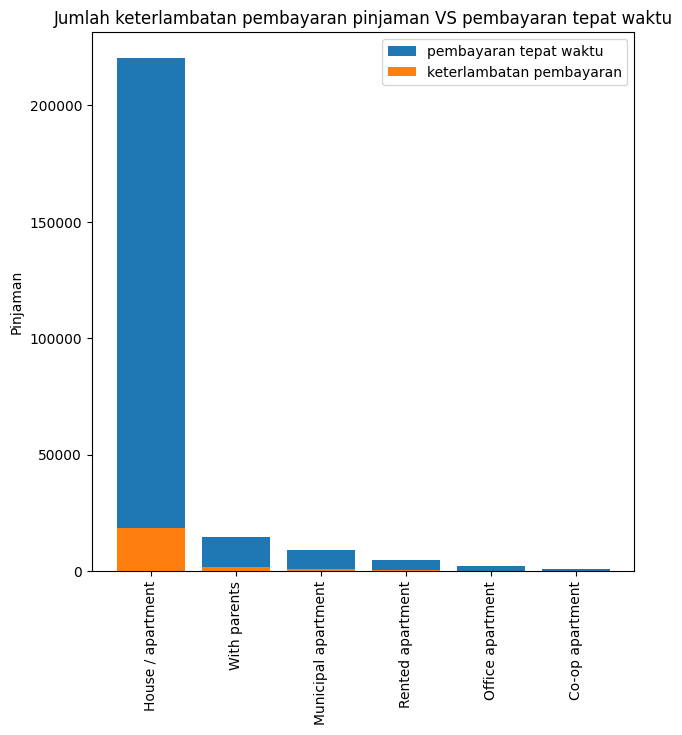

     NAME_HOUSING_TYPE  TARGET   total       Avg
1    House / apartment   18472  220483  0.083780
5         With parents    1725   14621  0.117981
2  Municipal apartment     814    9050  0.089945
4     Rented apartment     587    4676  0.125535
3     Office apartment     153    2301  0.066493
     NAME_HOUSING_TYPE  TARGET  total       Avg
5         With parents    1725  14621  0.117981
2  Municipal apartment     814   9050  0.089945
4     Rented apartment     587   4676  0.125535
3     Office apartment     153   2301  0.066493
0      Co-op apartment      84   1006  0.083499


In [ ]:
data['NAME_HOUSING_TYPE'].fillna('Data_Not_Available',inplace=True)
univariate_barplots(data, 'NAME_HOUSING_TYPE','TARGET',False)

- Orang yang tinggal di Rumah/Apartemen (House / apartment) mengajukan pinjaman paling banyak dan paling banyak
orang yang dianggap tidak mampu membayar pinjaman
- Jika dilihat persentasenya, orang yang tinggal di apartemen sewaan (Rented apartment) memiliki peluang tertinggi
untuk kesulitan membayar pinjaman/melakukan keterlambatan pembayaran.

### Days_Birth

In [ ]:
capable_days_birth = data[data['TARGET']==0]['DAYS_BIRTH'].values
not_capable_days_birth = data[data['TARGET']==1]['DAYS_BIRTH'].values

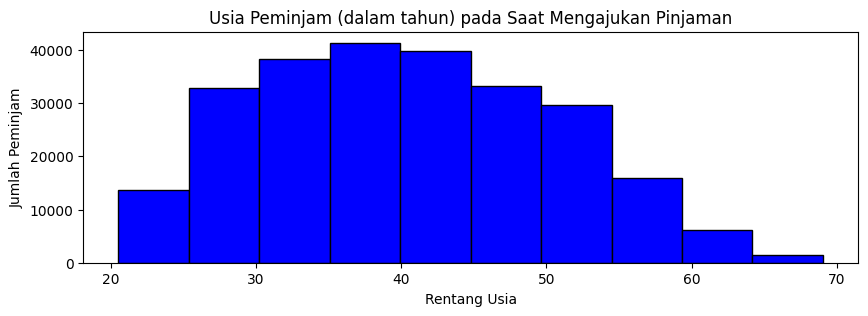

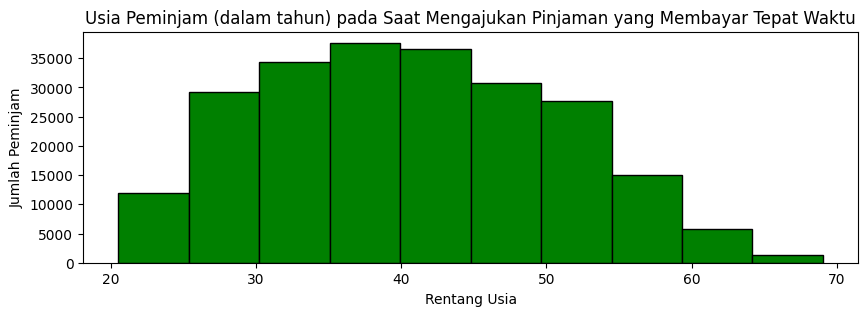

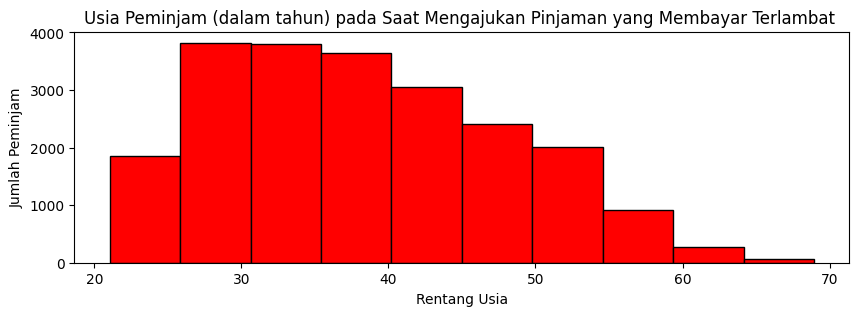

In [ ]:
plt.figure(figsize=(10,3))
plt.hist(data['DAYS_BIRTH'].values, bins=10, edgecolor='black', color='blue')
plt.title('Usia Peminjam (dalam tahun) pada Saat Mengajukan Pinjaman')
plt.xlabel('Rentang Usia')
plt.ylabel('Jumlah Peminjam')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(capable_days_birth, bins=10, edgecolor = 'black', color = 'green')
plt.title('Usia Peminjam (dalam tahun) pada Saat Mengajukan Pinjaman yang Membayar Tepat Waktu')
plt.xlabel('Rentang Usia')
plt.ylabel('Jumlah Peminjam')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(not_capable_days_birth, bins=10, edgecolor='black', color='red')
plt.title('Usia Peminjam (dalam tahun) pada Saat Mengajukan Pinjaman yang Membayar Terlambat ')
plt.xlabel('Rentang Usia')
plt.ylabel('Jumlah Peminjam')
plt.show()

- Sebagian besar orang yang mengajukan pinjaman berada dalam kisaran 35-40 tahun demikian halnya dengan rentang usia 40-45 tahun. Sedangkan, jumlah peminjam usia <25 tahun atau usia >65 tahun sangat sedikit.
- Orang-orang yang dianggap paling mampu mengembalikan pinjaman adalah orang-orang di rentang usia 35-40 tahun dan 40-45 tahun.
- Orang yang berusia dalam rentang 25-30 tahun dan 30-35 tahun memiliki peluang besar memiliki kesulitan dalam mengembalikan pinjaman.

### Days_Registration

In [ ]:
capable_days_registration = data[data['TARGET']==0]['DAYS_REGISTRATION'].values
not_capable_days_registration = data[data['TARGET']==1]['DAYS_REGISTRATION'].values

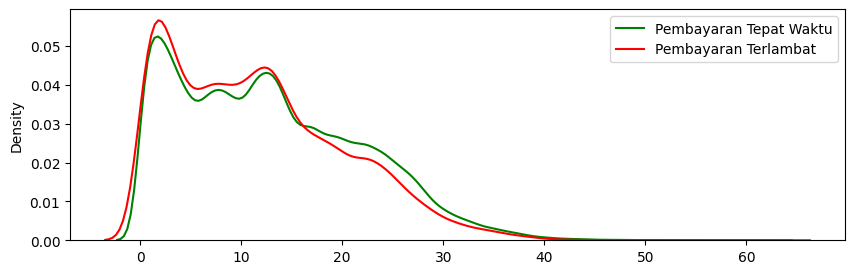

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(capable_days_registration,hist=False,label="Pembayaran Tepat Waktu", color='green')
sns.distplot(not_capable_days_registration,hist=False,label="Pembayaran Terlambat", color='red')
plt.legend()
plt.show()

- Sebagian besar peminjam telah mengubah pendaftaran mereka kurang dari 41 tahun sebelum
permohonan pinjaman, sedangkan dalam banyak kasus kurang dari 13 tahun.

### Cnt_Fam_Members

In [ ]:
capable_family_members = data[data['TARGET']==0]['CNT_FAM_MEMBERS'].values
not_capable_family_members = data[data['TARGET']==1]['CNT_FAM_MEMBERS'].values

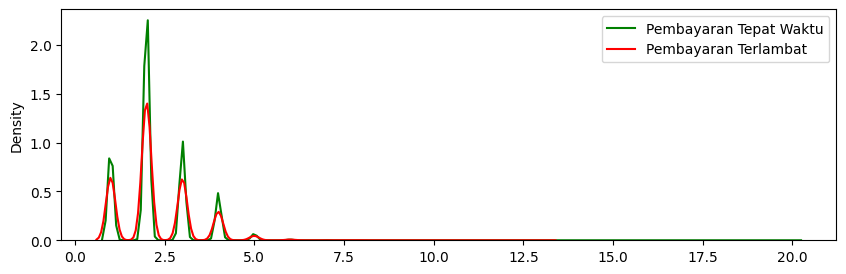

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(capable_family_members, hist=False, label="Pembayaran Tepat Waktu", color='green')
sns.distplot(not_capable_family_members, hist=False, label="Pembayaran Terlambat", color='red')
plt.legend()
plt.show()

Sebagian besar peminjam memiliki 2 anggota keluarga dan sangat sedikit pelamar dengan >5
anggota keluarga

### Weekday_Appr_Process_Start

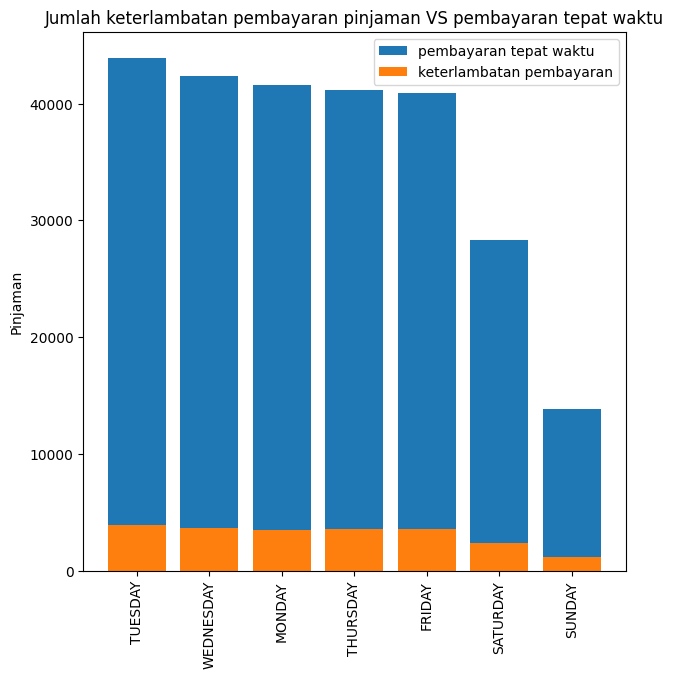

  WEEKDAY_APPR_PROCESS_START  TARGET  total       Avg
5                    TUESDAY    3957  43948  0.090038
6                  WEDNESDAY    3676  42332  0.086837
1                     MONDAY    3462  41591  0.083239
4                   THURSDAY    3623  41197  0.087943
0                     FRIDAY    3589  40897  0.087757
  WEEKDAY_APPR_PROCESS_START  TARGET  total       Avg
1                     MONDAY    3462  41591  0.083239
4                   THURSDAY    3623  41197  0.087943
0                     FRIDAY    3589  40897  0.087757
2                   SATURDAY    2371  28321  0.083719
3                     SUNDAY    1157  13851  0.083532


In [ ]:
univariate_barplots(data, 'WEEKDAY_APPR_PROCESS_START', 'TARGET', False)

Hal ini sangat menarik karena jumlah peminjam yang tersebar hampir merata
sepanjang hari kerja (Senin/Monday-Jumat/Friday) (sekitar 40 ribu peminjam per hari) (16-17%), sedangkan jumlah peminjam sangat rendah pada hari Minggu (Sunday)

###EXT_SOURCE_2

In [ ]:
capable_ext_source_2 = data[data['TARGET']==0]['EXT_SOURCE_2'].values
not_capable_ext_source_2 = data[data['TARGET']==1]['EXT_SOURCE_2'].values

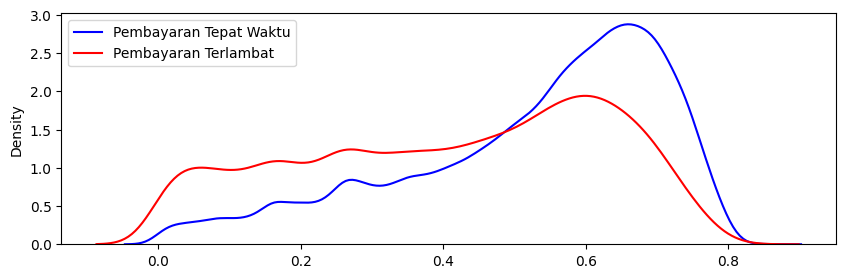

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(capable_ext_source_2,hist=False,label="Pembayaran Tepat Waktu", color='blue')
sns.distplot(not_capable_ext_source_2,hist=False,label="Pembayaran Terlambat", color='red')
plt.legend()
plt.show()


Terlihat bahwa terdapat perbedaan yang signifikan yang dapat dilihat dari plot PDF sehingga feature ini akan menjadi feature yang penting

###EXT_SOURCE_3

In [ ]:
capable_ext_source_3 = data[data['TARGET']==0]['EXT_SOURCE_3'].values
not_capable_ext_source_3 = data[data['TARGET']==1]['EXT_SOURCE_3'].values

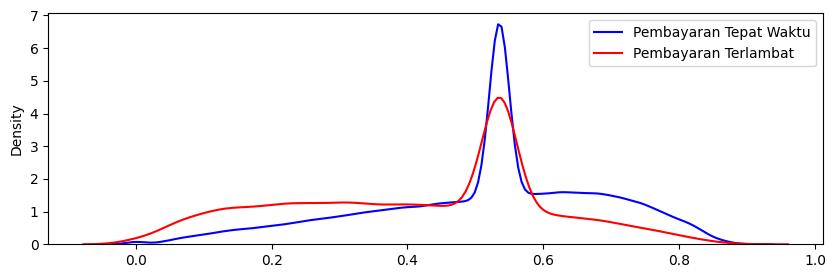

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(capable_ext_source_3,hist=False,label="Pembayaran Tepat Waktu", color='blue')
sns.distplot(not_capable_ext_source_3,hist=False,label="Pembayaran Terlambat", color='red')
plt.legend()
plt.show()


terlihat bahwa data terpisahkan dengan cukup baik sehingga feature ini akan menjadi feature penting


## Bivariate Analysis

Pada bagian ini akan dianalisis dua variabel dari dataset.

### NAME_CONTRACT_TYPE & AMT_CREDIT

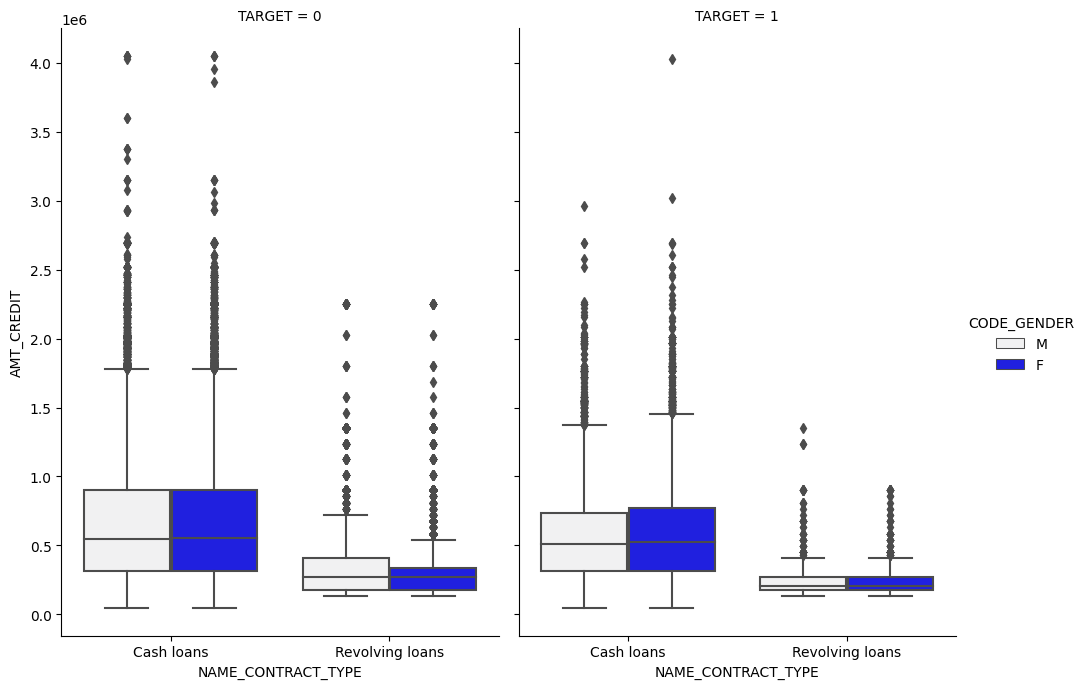

In [ ]:
sns.catplot(x="NAME_CONTRACT_TYPE", y="AMT_CREDIT", hue="CODE_GENDER" ,col="TARGET",\
            data=data,color = "BLUE",kind="box", height=7, aspect=.7);

Ini menunjukkan bahwa Pria & Wanita dengan Pinjaman Tunai (Cash Loan) memiliki peluang lebih tinggi untuk dianggap mampu membayar kembali pinjaman berdasarkan Jumlah Kredit (Credit Amount) mereka

### NAME_INCOME_TYPE & AMT_CREDIT

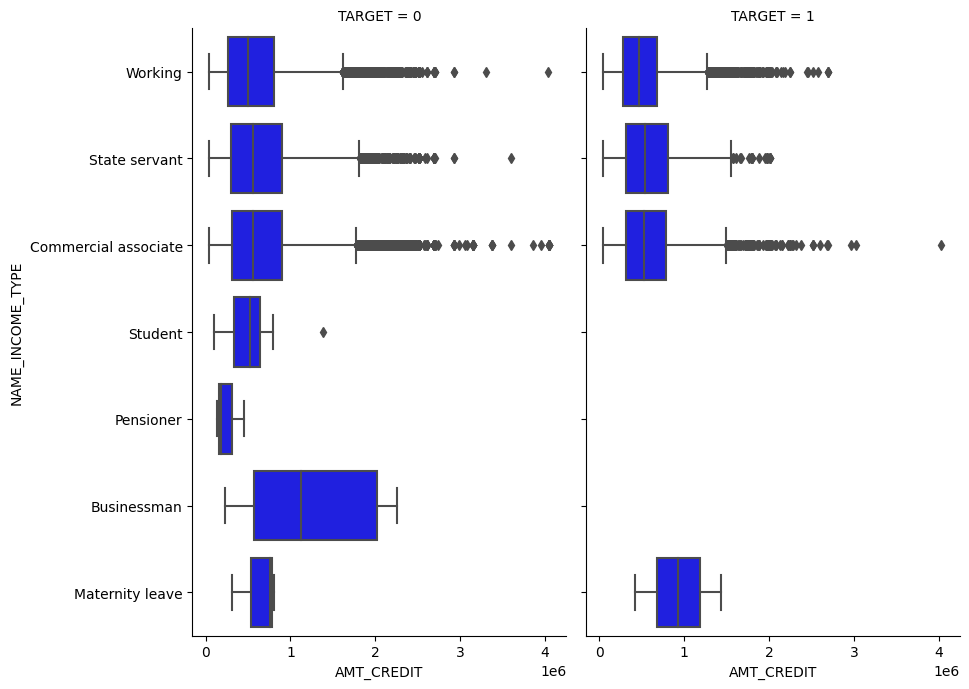

In [ ]:
sns.catplot(x="AMT_CREDIT", y="NAME_INCOME_TYPE", col="TARGET",
            data=data,color = "BLUE",kind="box", height=7, aspect=.7);

Ini menunjukkan bahwa peminjam dengan Nilai Jumlah Kredit Lebih Tinggi di berbagai jenis pendapatan memiliki kemungkinan lebih tinggi dianggap mampu melakukan pelunasan pinjaman, terutama di
kasus 'Pengangguran', 'Mahasiswa' dan 'Pengusaha'

### AMT_CREDIT & AMT_ANNUITY

<Axes: xlabel='AMT_CREDIT', ylabel='AMT_ANNUITY'>

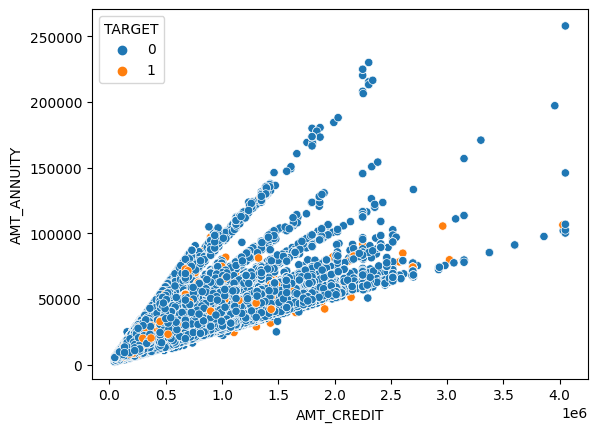

In [ ]:
sns.scatterplot(
    data=data, x="AMT_CREDIT", y="AMT_ANNUITY", hue="TARGET",\
    sizes=(20, 200)
)

- Hal ini menunjukkan bahwa Jumlah Kredit (AMT_CREDIT) dan Jumlah Anuitas (AMT_ANNUITY) berbanding lurus
satu sama lain. Jika Jumlah Kredit tinggi, Jumlah Anuitas yang sama juga akan tinggi.
- Terlihat grafik yang hampir linear.

#Modelling

Model machine learning dapat bekerja hanya pada data numeri. Oleh karena itu, akan dilakukan proses data encoding untuk memodelkan.

## Data Encoding

In [ ]:
#menampilkan informasi dari data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    252137 non-null  int64  
 1   TARGET                        252137 non-null  int64  
 2   NAME_CONTRACT_TYPE            252137 non-null  object 
 3   CODE_GENDER                   252137 non-null  object 
 4   FLAG_OWN_CAR                  252137 non-null  object 
 5   FLAG_OWN_REALTY               252137 non-null  object 
 6   CNT_CHILDREN                  252137 non-null  int64  
 7   AMT_INCOME_TOTAL              252137 non-null  float64
 8   AMT_CREDIT                    252137 non-null  float64
 9   AMT_ANNUITY                   252137 non-null  float64
 10  AMT_GOODS_PRICE               252137 non-null  float64
 11  NAME_TYPE_SUITE               252137 non-null  object 
 12  NAME_INCOME_TYPE              252137 non-nul

Berdasarkan output, dapat diketahui bahwa jumlah variabel yang bertipe kategorik sebanyak 13 yang selanjutya akan dilakukan one hot encoding

In [ ]:
#menyimpan variabel kategorik dalam variabel categorical_cols
categorical_cols = data.select_dtypes(include='object')

In [ ]:
#menampilkan shape dari data kategorik
categorical_cols.shape

(252137, 13)

Terlihat bahwa jumlah barisnya sebanyak 252.137 dan jumlah kolomnya sebanyak 13

In [ ]:
#menyimpan variabel numerik dalam variabel categorical_cols
numerical_cols = data.select_dtypes(include=np.number)

In [ ]:
#menampilkan shape dari data numerik
numerical_cols.shape

(252137, 68)

Terlihat bahwa jumlah barisnya sebanyak 252.137 dan jumlah kolomnya sebanyak 68

In [ ]:
#menampilkan unique value pada data kategorik
for col in categorical_cols:
  print(data[col].value_counts())
  print()

Cash loans         226224
Revolving loans     25913
Name: NAME_CONTRACT_TYPE, dtype: int64

F    157181
M     94956
Name: CODE_GENDER, dtype: int64

N    157719
Y     94418
Name: FLAG_OWN_CAR, dtype: int64

Y    171082
N     81055
Name: FLAG_OWN_REALTY, dtype: int64

Unaccompanied      206114
Family              31659
Spouse, partner      9663
Children             2250
Other_B              1473
Other_A               762
Group of people       216
Name: NAME_TYPE_SUITE, dtype: int64

Working                 158774
Commercial associate     71617
State servant            21703
Student                     18
Pensioner                   10
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Secondary / secondary special    173286
Higher education                  66669
Incomplete higher                  9757
Lower secondary                    2287
Academic degree                     138
Name: NAME_EDUCATION_TYPE, dtype: int64

Married          

Dari output di atas, dapat diketahui unique value dari tiap kolom yang bertipe kategork

In [ ]:
#onehot encoding
onehot = pd.get_dummies(categorical_cols, drop_first=True)

In [ ]:
#menampilkan kolom hasil encoding
onehot.head()

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,EMERGENCYSTATE_MODE_Yes
0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [ ]:
#menampilkan kolom encoding
onehot.columns

Index(['NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_M', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_Y', 'NAME_TYPE_SUITE_Family',
       'NAME_TYPE_SUITE_Group of people', 'NAME_TYPE_SUITE_Other_A',
       'NAME_TYPE_SUITE_Other_B', 'NAME_TYPE_SUITE_Spouse, partner',
       'NAME_TYPE_SUITE_Unaccompanied',
       ...
       'ORGANIZATION_TYPE_Trade: type 4', 'ORGANIZATION_TYPE_Trade: type 5',
       'ORGANIZATION_TYPE_Trade: type 6', 'ORGANIZATION_TYPE_Trade: type 7',
       'ORGANIZATION_TYPE_Transport: type 1',
       'ORGANIZATION_TYPE_Transport: type 2',
       'ORGANIZATION_TYPE_Transport: type 3',
       'ORGANIZATION_TYPE_Transport: type 4', 'ORGANIZATION_TYPE_University',
       'EMERGENCYSTATE_MODE_Yes'],
      dtype='object', length=110)

In [ ]:
#menampilkan shape dari hasil encoding
onehot.shape

(252137, 110)

Terlihat bahwa shape datafram encoding jumlah barisnya sebanyak 252.137 dan jumlah kolomnya sebanyak 110

In [ ]:
#menggabungkan data hasil encoding dengan data numerik
data_final = pd.concat([onehot, numerical_cols],axis=1)

In [ ]:
#menampilkan data final
data_final

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,EMERGENCYSTATE_MODE_Yes,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_M

Terlihat bahwa shape data final jumlah barisnya sebanyak 252.137 dan jumlah kolomnya sebanyak 178 kolom.

Pada modelling, data akan dibagi menjadi feature dan target.

In [ ]:
#drop kolom TARGET dan menyimpan kolom2 dalam variabel x
x=data_final.drop(['TARGET'], axis=1)

In [ ]:
#menyimpan variabel TARGET ke dalam variabel y
y=data_final[('TARGET')]

## Random Undersampling

In [ ]:
#melihat jumlah tiap value pada data y
y.value_counts()

0    230302
1     21835
Name: TARGET, dtype: int64

Terlihat bahwa data variabel TARGET tidak balance sehingga perlu dilakukan resampling dengan metode undersampling. Metode ini dipilih karena menghasilkan nilai ROC AUC lebih baik dibandingkan dengan oversampling.

In [ ]:
# import random undersampling and other necessary libraries
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# summarize class distribution
print("Before undersampling: ", Counter(y))

# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
x_under, y_under = undersample.fit_resample(x, y)

# summarize class distribution
print("After undersampling: ", Counter(y_under))

Before undersampling:  Counter({0: 230302, 1: 21835})
After undersampling:  Counter({0: 21835, 1: 21835})


## Feature Selection

Feature selection menggunakan metode Mutual Information Gain (MIG) adalah metode untuk memilih fitur yang paling relevan dalam pemodelan statistik. MIG mengukur seberapa banyak informasi yang diberikan oleh suatu fitur tentang kelas target. Dalam feature selection, MIG digunakan untuk memilih fitur yang paling berguna dan relevan untuk memprediksi variabel target. Dengan memilih fitur yang paling informatif, kita dapat meningkatkan akurasi model dan mengurangi dimensi data yang tidak diperlukan, sehingga mempercepat waktu pelatihan dan meminimalkan overfitting.

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# menentukan mutual information
mutual_info = mutual_info_classif(x_under, y_under)
mutual_info

array([0.00380947, 0.00396469, 0.        , 0.        , 0.00043622,
       0.0023448 , 0.        , 0.        , 0.00070364, 0.00525157,
       0.00229399, 0.00579054, 0.        , 0.00323641, 0.        ,
       0.00774225, 0.01256966, 0.        , 0.00090498, 0.00906401,
       0.00613212, 0.        , 0.00024369, 0.00227442, 0.        ,
       0.00424166, 0.        , 0.        , 0.0023356 , 0.        ,
       0.00457229, 0.        , 0.00293519, 0.00606638, 0.        ,
       0.00170961, 0.00412777, 0.00237456, 0.00035009, 0.00406028,
       0.00576288, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0005563 , 0.0001399 , 0.00107752, 0.00160847,
       0.        , 0.00025955, 0.        , 0.        , 0.00218386,
       0.        , 0.        , 0.00167045, 0.        , 0.        ,
       0.0013043 , 0.        , 0.        , 0.        , 0.00062031,
       0.00051815, 0.00041716, 0.        , 0.00305583, 0.        ,
       0.00244234, 0.00075305, 0.00086635, 0.00046157, 0.00303

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_under.columns
mutual_info.sort_values(ascending=False)

EXT_SOURCE_2                          0.041374
AMT_ANNUITY                           0.040461
EXT_SOURCE_3                          0.037326
AMT_CREDIT                            0.025747
AMT_GOODS_PRICE                       0.019433
                                        ...   
NAME_HOUSING_TYPE_Office apartment    0.000000
ORGANIZATION_TYPE_Police              0.000000
ORGANIZATION_TYPE_Restaurant          0.000000
NAME_HOUSING_TYPE_With parents        0.000000
OCCUPATION_TYPE_Secretaries           0.000000
Length: 177, dtype: float64

In [ ]:
from sklearn.feature_selection import SelectKBest
# select the top 20 important features
sel_twenty_cols = SelectKBest(mutual_info_classif, k=20)
sel_twenty_cols.fit(x_under, y_under)
x_under.columns[sel_twenty_cols.get_support()]

Index(['NAME_TYPE_SUITE_Other_A', 'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Married', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLOORSMAX_MEDI', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_DAY'],
      dtype='object')

In [ ]:
#menyimpan feature importance data train
x_feat=x_under[['NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Secondary / secondary special', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'TOTALAREA_MODE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3']]

##Split Data

Selanjutnya, kita split data menjadi data target dan data test untuk training model dan mengetes model yang digunakan.

In [ ]:
#import library
from sklearn.model_selection import train_test_split

In [ ]:
#split data dengan proporsi data train dan data test sebesar 7:3
x_train, x_test, y_train, y_test = train_test_split(x_feat, y_under, test_size=0.3,random_state=42)

In [ ]:
print( x_train.shape,x_test.shape)

(30569, 20) (13101, 20)


Diperoleh shape dari data train (30569, 177) dan data test (13101, 177)

##Standardization

Setelah dilakukan undersampling, kemudian dataset akan di standardisasi dengan menggunakan standar scaler. Agar data yang digunakan tidak memiliki penyimpangan yang besar.

In [ ]:
#import library
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
#standardisasi dengan library StandardScaler()
scaler = StandardScaler()

In [ ]:
#standardisasi dengan library StandardScaler()
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.fit_transform(x_test)

##Modelling Undersampling

In [ ]:
#import library
from sklearn.metrics import classification_report, roc_auc_score

###Random Forest

In [ ]:
#import library
from sklearn.ensemble import RandomForestClassifier
#membuat model dengan metode random forest
rf_under = RandomForestClassifier(random_state=42).fit(x_train_scale, y_train)
#membuat variabel pred
rfpred_under = rf_under.predict(x_test_scale)

In [ ]:
#menampilkan nilai ROC AUC
rf_ra = roc_auc_score(y_test, rfpred_under)
print("ROC AUC score for Random Forest: ", rf_ra)

ROC AUC score for Random Forest:  0.6612561903625059


### Logistic Regression

In [ ]:
#import library
from sklearn.linear_model import LogisticRegression
#membuat model dengan metode Logistic Regression
logit_under = LogisticRegression(random_state=42).fit(x_train_scale, y_train)
#membuat variabel pred
logitpred_under = logit_under.predict(x_test_scale)

In [ ]:
#menampilkan nilai ROC AUC
logit_ra = roc_auc_score(y_test, rfpred_under)
print("ROC AUC score for Logistic Regression: ",logit_ra )

ROC AUC score for Logistic Regression:  0.6612561903625059


###Gradient Boosting

In [ ]:
#import library
from sklearn.ensemble import GradientBoostingClassifier
#membuat model dengan metode gradient boosting
gboost_under = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(x_train_scale, y_train)
#membuat variabel pred
gbpred_under = gboost_under.predict(x_test_scale)

In [ ]:
#menampilkan nilai ROC AUC
gb_ra=roc_auc_score(y_test, gbpred_under)
print("ROC AUC score for Gradient Boosting: ", gb_ra)

ROC AUC score for Gradient Boosting:  0.6633938402440995


###Light GBM

In [ ]:
#import library
from lightgbm import LGBMClassifier
#membuat model dengan metode Light GBM
lgbm_under= LGBMClassifier(random_state=42).fit(x_train_scale, y_train)
#membuat variabel pred
lgbmpred_under = lgbm_under.predict(x_test_scale)

In [ ]:
#menampilkan nilai ROC AUC
lgbm_ra=roc_auc_score(y_test, lgbmpred_under)
print("ROC AUC score for Light GBM: ", lgbm_ra)

ROC AUC score for Light GBM:  0.6667535869715839


##Evaluation

True Positive (TP)
Merupakan data positif yang diprediksi benar. Contohnya, pasien menderita kanker (class 1) dan dari model yang dibuat memprediksi pasien tersebut menderita kanker (class 1).

True Negative (TN)
Merupakan data negatif yang diprediksi benar. Contohnya, pasien tidak menderita kanker (class 2) dan dari model yang dibuat memprediksi pasien tersebut tidak menderita kanker (class 2).

False Postive (FP) — Type I Error
Merupakan data negatif namun diprediksi sebagai data positif. Contohnya, pasien tidak menderita kanker (class 2) tetapi dari model yang telah memprediksi pasien tersebut menderita kanker (class 1).


False Negative (FN) — Type II Error
Merupakan data positif namun diprediksi sebagai data negatif. Contohnya, pasien menderita kanker (class 1) tetapi dari model yang dibuat memprediksi pasien tersebut tidak menderita kanker (class 2).


Accuracy
Accuracy menggambarkan seberapa akurat model dapat mengklasifikasikan dengan benar. Maka, accuracy merupakan rasio prediksi benar (positif dan negatif) dengan keseluruhan data.

Precision (Positive Predictive Value)
Precision menggambarkan tingkat keakuratan antara data yang diminta dengan hasil prediksi yang diberikan oleh model. Maka, precision merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positif.

Recall atau Sensitivity (True Positive Rate)
Recall menggambarkan keberhasilan model dalam menemukan kembali sebuah informasi. Maka, recall merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif.

In [ ]:
#import library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

###Random Forest

In [ ]:
#menampilkan evaluation metrics
print(classification_report(y_test, rfpred_under))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67      6547
           1       0.67      0.64      0.66      6554

    accuracy                           0.66     13101
   macro avg       0.66      0.66      0.66     13101
weighted avg       0.66      0.66      0.66     13101



In [ ]:
rf_ac = accuracy_score(y_test, rfpred_under)
rf_pr = precision_score(y_test, rfpred_under)
rf_re = recall_score(y_test, rfpred_under)
rf_f1 = f1_score (y_test, rfpred_under)

In [ ]:
#membuat confusion matrix dari model random forest
rf_cm= confusion_matrix(y_test, rfpred_under)

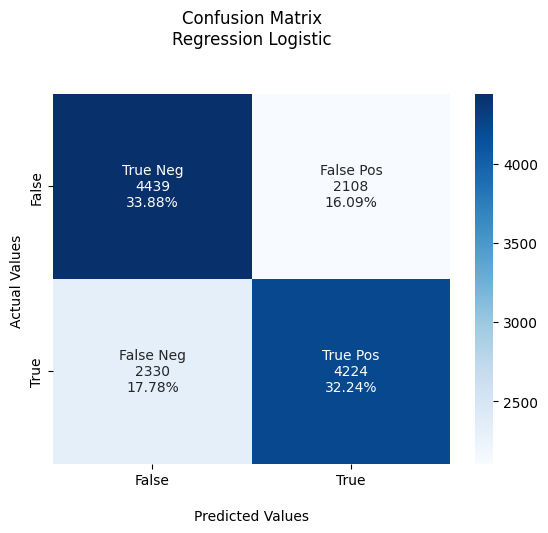

In [ ]:
#menampilkan confusion matrix dari model random forest
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                rf_cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     rf_cm.flatten()/np.sum(rf_cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(rf_cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\nRegression Logistic\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

###Logistic Regression

In [ ]:
#menampilkan evaluation metrics
print(classification_report(y_test, logitpred_under))

              precision    recall  f1-score   support

           0       0.66      0.67      0.67      6547
           1       0.67      0.66      0.66      6554

    accuracy                           0.67     13101
   macro avg       0.67      0.67      0.67     13101
weighted avg       0.67      0.67      0.67     13101



In [ ]:
logit_ac = accuracy_score(y_test, logitpred_under)
logit_pr = precision_score(y_test, logitpred_under)
logit_re = recall_score(y_test, logitpred_under)
logit_f1 = f1_score (y_test, logitpred_under)

In [ ]:
#membuat confusion matrix dari model regresi logistik
logit_cm= confusion_matrix(y_test, logitpred_under)

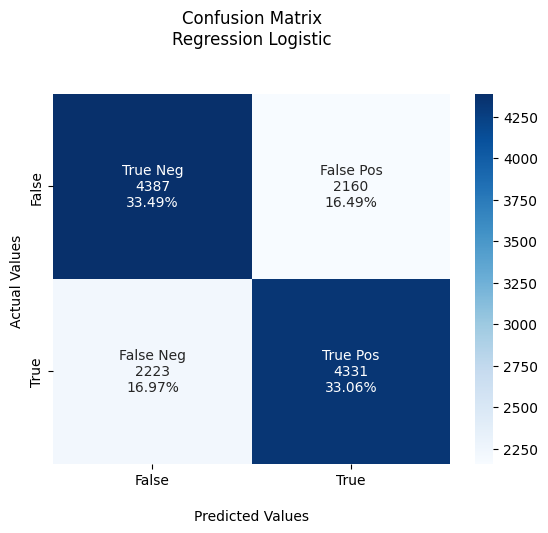

In [ ]:
#menampilkan confusion matrix dari model regresi logistik
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                logit_cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     logit_cm.flatten()/np.sum(logit_cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(logit_cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\nRegression Logistic\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

###Gradient Boosting

In [ ]:
#menampilkan evaluation metrics
print(classification_report(y_test, gbpred_under))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67      6547
           1       0.67      0.65      0.66      6554

    accuracy                           0.66     13101
   macro avg       0.66      0.66      0.66     13101
weighted avg       0.66      0.66      0.66     13101



In [ ]:
#membuat confusion matrix dari model gradient boosting
gb_cm= confusion_matrix(y_test, gbpred_under)

In [ ]:
gb_ac = accuracy_score(y_test, gbpred_under)
gb_pr = precision_score(y_test, gbpred_under)
gb_re = recall_score(y_test, gbpred_under)
gb_f1 = f1_score (y_test, gbpred_under)

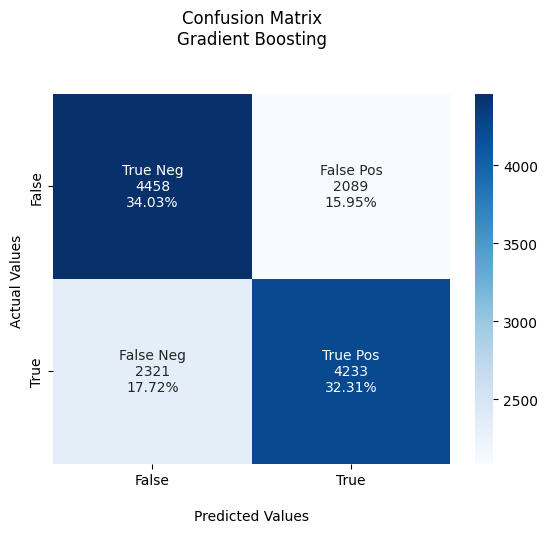

In [ ]:
#menampilkan confusion matrix dari model gradient boosting
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                gb_cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     gb_cm.flatten()/np.sum(gb_cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(gb_cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\nGradient Boosting\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

###Light GBM

In [ ]:
#menampilkan evaluation metrics
print(classification_report(y_test, lgbmpred_under))

              precision    recall  f1-score   support

           0       0.66      0.69      0.67      6547
           1       0.67      0.65      0.66      6554

    accuracy                           0.67     13101
   macro avg       0.67      0.67      0.67     13101
weighted avg       0.67      0.67      0.67     13101



In [ ]:
#membuat confusion matrix dari model Light GBM
lgbm_cm= confusion_matrix(y_test, lgbmpred_under)

In [ ]:
lgbm_ac = accuracy_score(y_test, lgbmpred_under)
lgbm_pr = precision_score(y_test, lgbmpred_under)
lgbm_re = recall_score(y_test, lgbmpred_under)
lgbm_f1 = f1_score (y_test, lgbmpred_under)

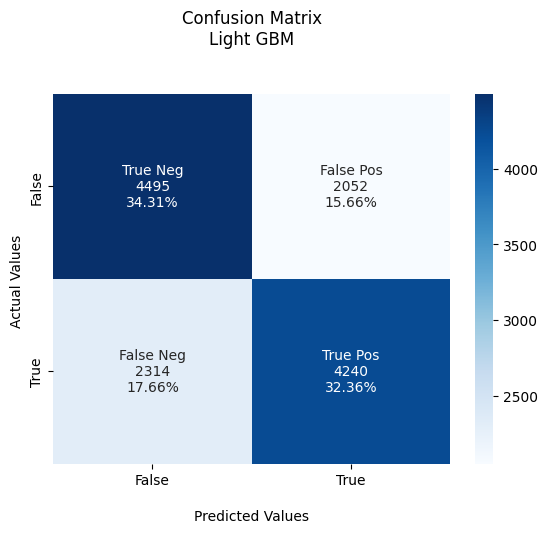

In [ ]:
#menampilkan confusion matrix dari model Light GBM
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                lgbm_cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     lgbm_cm.flatten()/np.sum(lgbm_cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(lgbm_cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\nLight GBM\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

##Comparison Model

In [ ]:
compa_model = {'Accuracy': [rf_ac, logit_ac, gb_ac, lgbm_ac],
              'ROC AUC': [rf_ra, logit_ra, gb_ra, lgbm_ra],
             'Precision': [rf_pr, logit_pr, gb_pr, lgbm_pr],
             'Recall': [rf_re, logit_re, gb_re, lgbm_re],
             'F1': [rf_f1, logit_f1, gb_f1, lgbm_f1]}

eval_model = pd.DataFrame(compa_model, index=['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'Light GBM'])
eval_model

,Accuracy,ROC AUC,Precision,Recall,F1
Random Forest,0.661247,0.661256,0.667088,0.644492,0.655595
Logistic Regression,0.665445,0.661256,0.667232,0.660818,0.664009
Gradient Boosting,0.663384,0.663394,0.669567,0.645865,0.657502
Light GBM,0.666743,0.666754,0.673872,0.646933,0.660128


Berdasarkan nilai metriks evaluasi di atas, model terbaik yang dipilih adalah Light GBM.

##Feature Importance

In [ ]:
# Mendapatkan feature importance
importance = pd.DataFrame({'feature': x_train.columns, 'importance': lgbm_under.feature_importances_})
importance = importance.sort_values('importance', ascending=False).reset_index(drop=True)
importance

,feature,importance
0,AMT_ANNUITY,340
1,EXT_SOURCE_2,301
2,EXT_SOURCE_3,298
3,DAYS_EMPLOYED,292
4,DAYS_BIRTH,284
5,AMT_GOODS_PRICE,232
6,DAYS_LAST_PHONE_CHANGE,228
7,DAYS_REGISTRATION,210
8,AMT_CREDIT,205
9,REGION_POPULATION_RELATIVE,151


Feature yang terpilih sebagai aspek yang mempengaruhi gagal bayar adalah DAYS_EMPLOYED,AMT_ANNUITY,DAYS_BIRTH,AMT_CREDIT,NAME_EDUCATION_TYPE.